In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
import pyexasol
C = pyexasol.connect(dsn = '10.150.112.211..215:8563', user='vva02', password='Life@2.0')

In [4]:
df = pd.read_csv(r"C:\Users\vva02\Documents\Data\Commission_Share_Excluding_Accor.csv")
df['HOTEL_DEPARTURE_DATE'] = pd.to_datetime(df['HOTEL_DEPARTURE_DATE'])

In [5]:
commision = df.set_index('HOTEL_DEPARTURE_DATE')

In [6]:
commision.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='HOTEL_DEPARTURE_DATE', length=1096, freq=None)

In [7]:
y = commision['COMMISSION_SHARE'].resample('MS').mean()
y['2017':]

HOTEL_DEPARTURE_DATE
2017-01-01    13.835161
2017-02-01    13.860000
2017-03-01    13.861935
2017-04-01    13.709333
2017-05-01    13.264839
2017-06-01    13.736333
2017-07-01    13.570323
2017-08-01    13.506774
2017-09-01    13.612000
2017-10-01    13.401935
2017-11-01    13.496667
2017-12-01    13.363871
2018-01-01    13.386452
2018-02-01    13.501071
2018-03-01    13.271935
2018-04-01    13.253667
2018-05-01    12.904839
2018-06-01    12.864333
2018-07-01    13.294839
2018-08-01    13.209355
2018-09-01    13.027667
2018-10-01    13.201290
2018-11-01    13.227667
2018-12-01    13.186452
Freq: MS, Name: COMMISSION_SHARE, dtype: float64

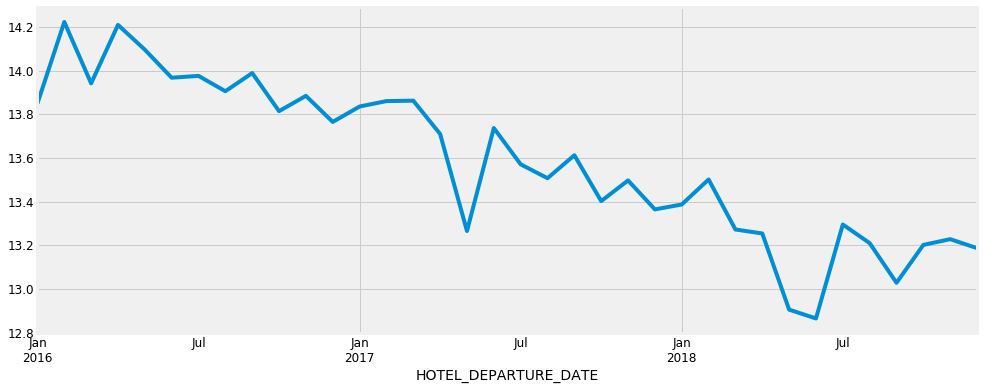

In [8]:
y.plot(figsize=(15,6))
plt.show()

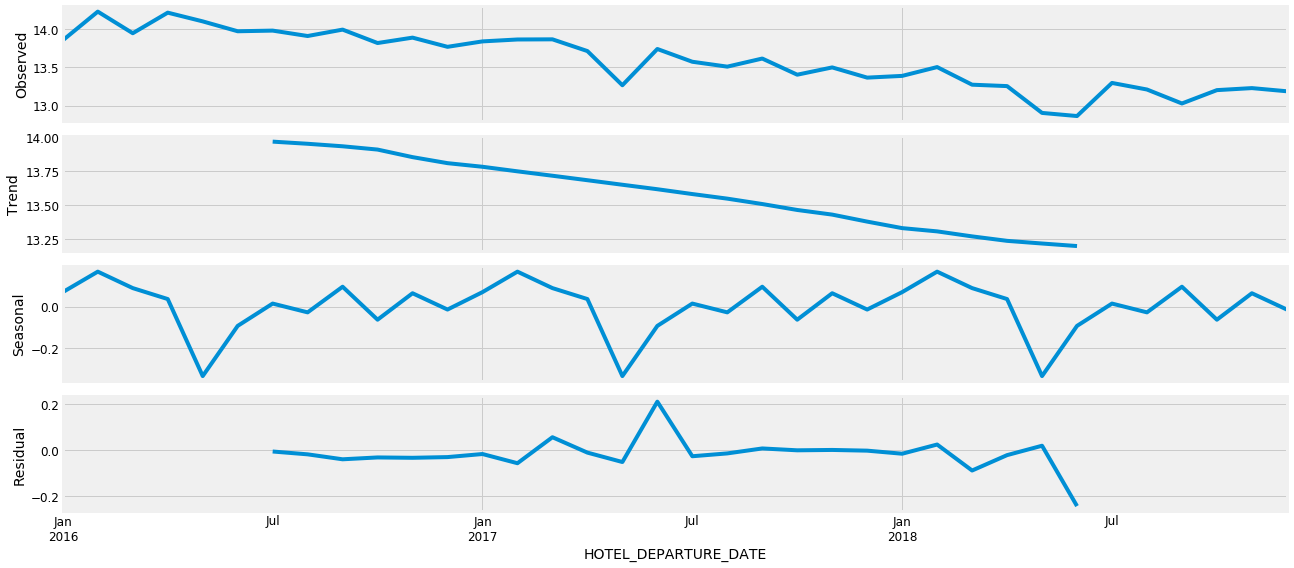

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:283.95463743487886
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:29.753664765952088
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-6.879399431183652
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10.044891077880543
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:235.20065375653292
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:14.810850134402122
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-5.186710334778937
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:11.498193522561337
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-13.771386990737211
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:8.250585971362561
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:-2.80721594251162
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1.528185446845805
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:-20.500211857129766


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:-1.9345224354471844
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:-6.1430281844344385
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1.8009936282837034
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:-9.92431802721221
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:8.688247465825881
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:-7.8865931070219375
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:3.263435364604002
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:-28.277148619397572
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:-0.7455602240118768
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:-9.23334686539675
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2.848204702177596
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:-19.221820001915397
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:3.0938036210580133
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:-2.438565153158164
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:3.58323688206124
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:-18.524085417876186
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:-0.006489453296903314
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:-3.32001

In [12]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4255      0.848      0.502      0.616      -1.237       2.088
ma.L1         -1.0001   1962.193     -0.001      1.000   -3846.829    3844.828
ar.S.L12      -0.6466      0.280     -2.311      0.021      -1.195      -0.098
sigma2         0.0357     70.155      0.001      1.000    -137.465     137.537


ValueError: operands could not be broadcast together with shapes (9,) (8,) (9,) 

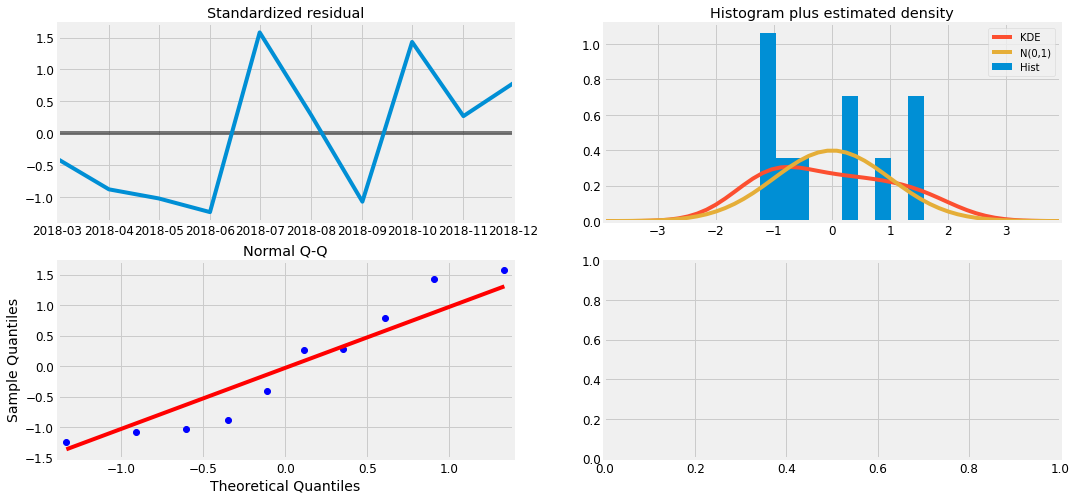

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

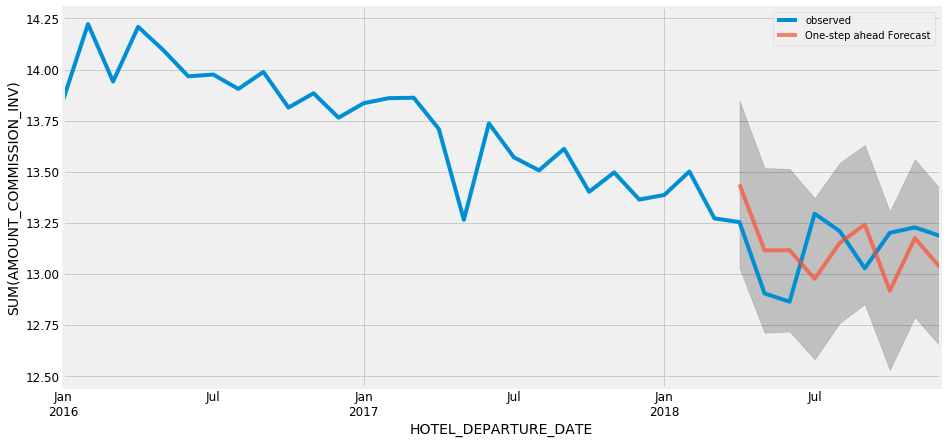

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('HOTEL_DEPARTURE_DATE')
ax.set_ylabel('SUM(AMOUNT_COMMISSION_INV)')
plt.legend()

plt.show()

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.04


In [16]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.21


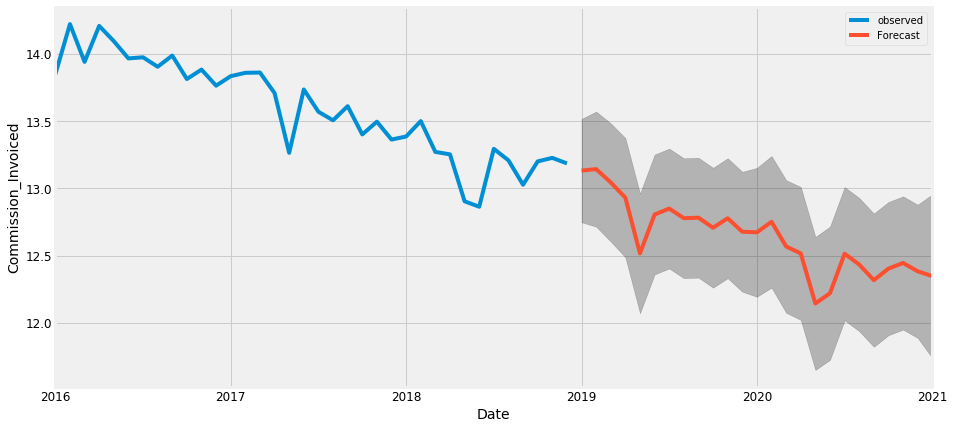

In [17]:
pred_uc = results.get_forecast(steps=25)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Commission_Invoiced')

plt.legend()
plt.show()